# Lab3 - Prior and Posterior predictive distributions
Justyna Gibas 403122

In [102]:
from cmdstanpy import CmdStanModel
import pandas as pd
import numpy as np
import arviz as az 
import matplotlib.pyplot as plt
import scipy.stats as stats

## Ex 1. Modeling prior predictive distribution

In [103]:
gen_quant = CmdStanModel(stan_file='prior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [104]:
samples = gen_quant.sample(data={'N':50}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [105]:
df = pd.DataFrame(samples.draws_pd())
df.describe()

,lp__,accept_stat__,N,y,p
count,1000.0,1000.0,1000.0,1000.000000,1000.000000
mean,0.0,0.0,50.0,9.914000,0.200117
std,0.0,0.0,0.0,2.802938,0.009947
min,0.0,0.0,50.0,2.000000,0.167752
25%,0.0,0.0,50.0,8.000000,0.193550
50%,0.0,0.0,50.0,10.000000,0.200103
75%,0.0,0.0,50.0,12.000000,0.207154
max,0.0,0.0,50.0,21.000000,0.234640


In [106]:
alergic_ratio = df['y']/50

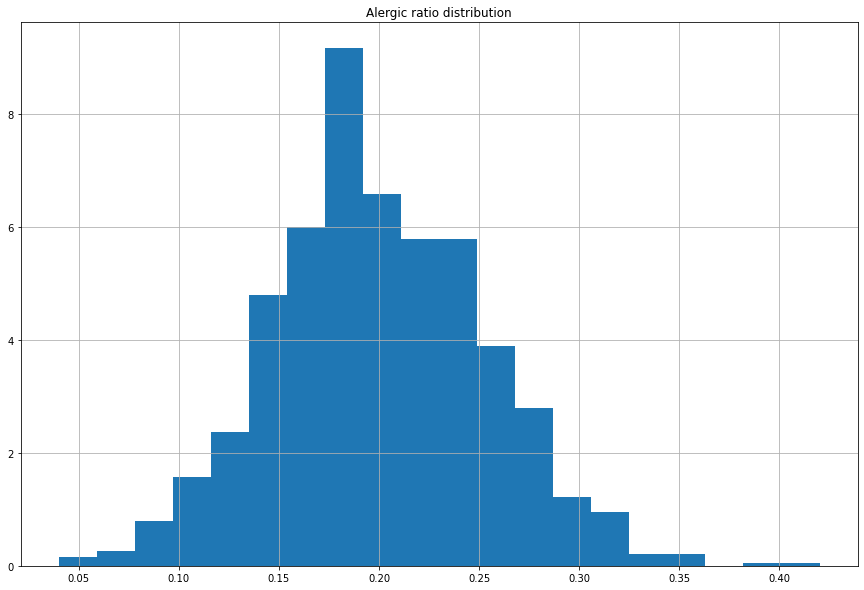

In [107]:
plt.figure(figsize=(15,10))
plt.hist(alergic_ratio, bins=20, density=True)
plt.grid()
plt.title('Alergic ratio distribution')
plt.show()

## Ex 2. Modeling posterior and posteior predictive distribution

In [108]:
gen_quant = CmdStanModel(stan_file='posterior.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [109]:
samples = gen_quant.sample(data={'N':50, 'y':7})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status


chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed

chain 3 |██████████| 00:00 Sampling completed


chain 4 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [110]:
df = pd.DataFrame(samples.draws_pd())
df.describe()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.0,4000.000000,4000.000000,4000.000000
mean,-23.172956,0.918367,1.002083,1.407000,2.643000,0.0,23.677110,0.198169,9.972250
std,0.688476,0.125573,0.137430,0.491336,1.459138,0.0,0.982311,0.009762,2.834958
min,-30.393400,0.028074,0.902933,1.000000,1.000000,0.0,22.683300,0.163100,1.000000
25%,-23.337550,0.892462,0.907249,1.000000,1.000000,0.0,22.976450,0.191642,8.000000
50%,-22.908850,0.969681,0.934204,1.000000,3.000000,0.0,23.383650,0.198325,10.000000
75%,-22.734975,0.999564,1.029039,2.000000,3.000000,0.0,24.053150,0.204844,12.000000
max,-22.682900,1.000000,1.236990,2.000000,7.000000,0.0,30.861800,0.237326,22.000000


In [111]:
alergic_ratio = df['y_pred']/50

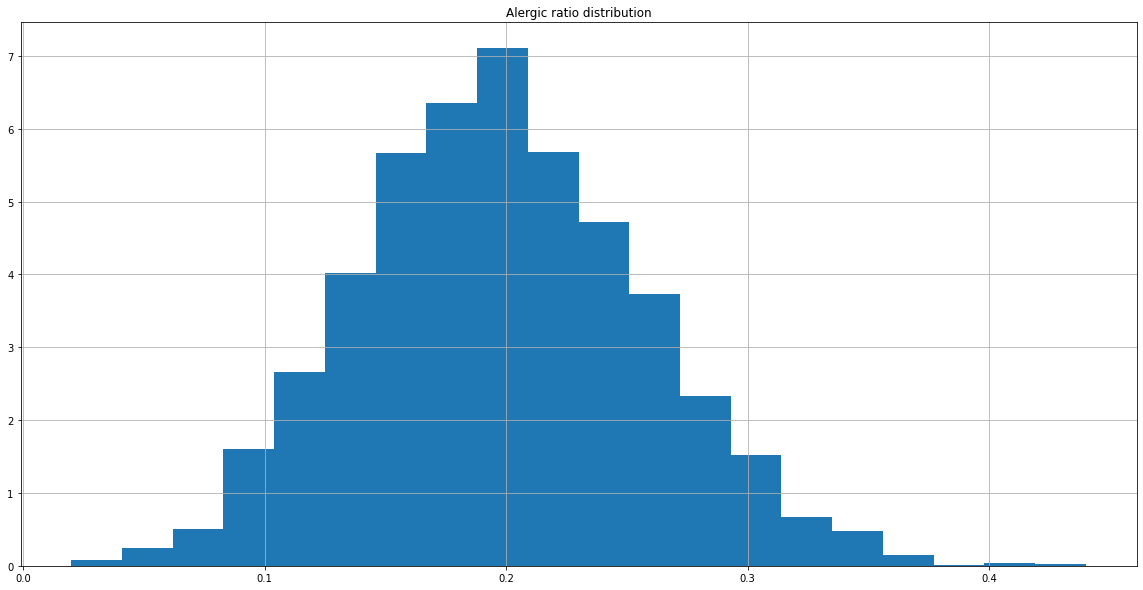

In [112]:
plt.figure(figsize=(20,10))
plt.hist(alergic_ratio, bins=20, density=True)
plt.grid()
plt.title('Alergic ratio distribution')
plt.show()

In [113]:
alergic_ratio_interval = az.hdi(np.array(alergic_ratio),hdi_prob=0.94)
expected_alergic_ratio = alergic_ratio.mean()
p_interval = az.hdi(np.array(df['p']),hdi_prob=0.94)
expected_p = df['p'].mean()
print('Expected allergic ratio: {0}, 94% density interwal {1}'.format(expected_alergic_ratio,alergic_ratio_interval))
print('Expected p: {0}, 94% density interwal {1}'.format(expected_p,p_interval))

Expected alergic ratio: 0.199445, 94% density interwal [0.1 0.3]
Expected p: 0.19816876449999998, 94% density interwal [0.180735 0.216467]


Expected value of allergic reaction ratio and p are close to each other. Only difference is that 94% density interval for allergic reactions in wider.

In [114]:
lower_probability =  (alergic_ratio < 0.2).sum() / alergic_ratio.count()
print('Probability that ratio is lower than the average probability from traditional vaccines: {0}'.format(lower_probability))

Probability that ratio is lower than the average probability from traditional vaccines: 0.44425
